# Project 2

Due date: July 27, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 27, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import zipfile
import os

In [2]:
url="https://raw.githubusercontent.com/dljaimes/Advanced-Methods-in-Data-Analysis_1_Grupo_5/main/dataTrain_carListings.csv"
data = pd.read_csv(url)
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [3]:
data.shape

(500000, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    500000 non-null  int64 
 1   Year     500000 non-null  int64 
 2   Mileage  500000 non-null  int64 
 3   State    500000 non-null  object
 4   Make     500000 non-null  object
 5   Model    500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

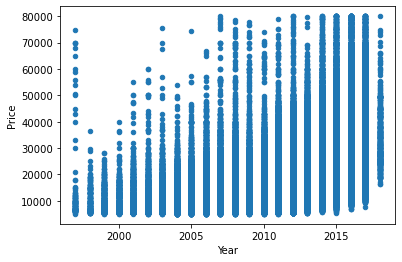

In [6]:
data.plot(kind='scatter', y='Price', x='Year');

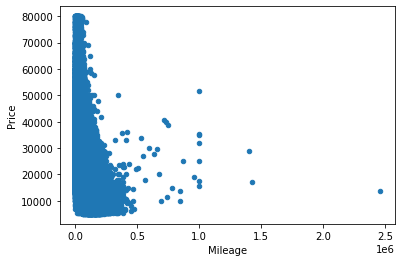

In [8]:
data.plot(kind='scatter', y='Price', x='Mileage');

In [9]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


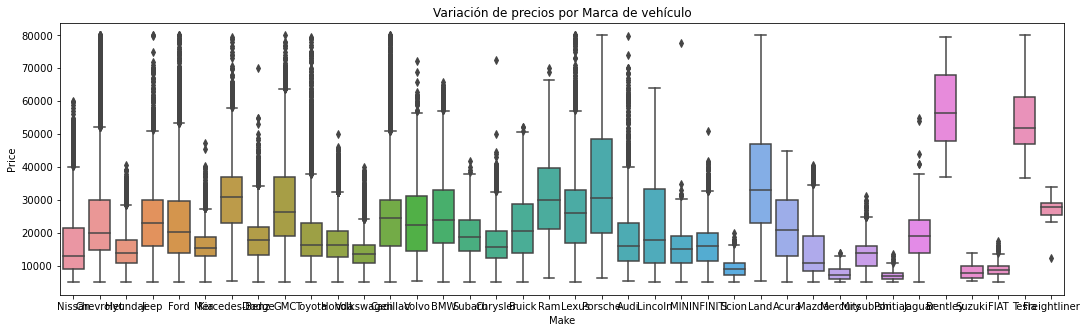

In [10]:
plt.figure(figsize=(18,5))
sn.boxplot(data=data[['Price', 'Make']],  x='Make', y='Price')
plt.title('Variación de precios por Marca de vehículo');

In [11]:
# Para la variable make:

make = data.Make.value_counts().to_frame()
make['cumsum'] = make.Make.cumsum()
make['pct_acum']= make['cumsum'] / 500000
make['pct_ind'] = make['Make'] / 500000

# Para la variable modelo:

modelos = data.Model.value_counts().to_frame()
modelos['cumsum'] = modelos.Model.cumsum()
modelos['pct_acum']= modelos['cumsum'] / 500000
modelos['pct_ind'] = modelos['Model'] / 500000

# Para la variable estado:

estados = data.State.value_counts().to_frame()
estados['cumsum'] = estados.State.cumsum()
estados['pct_acum']= estados['cumsum'] / 500000
estados['pct_ind']= estados['State'] / 500000
estados.reset_index(inplace=True)

In [12]:
data.shape

(500000, 6)

### AJUSTE EN LAS VARIABLES make y State

In [13]:
# Binning Make:

marcas = data.groupby(by='Make')['Price'].describe().sort_values(by='mean', ascending=False)#.reset_index(inplace=True)
marcas.reset_index(inplace=True)
marcas['quartil_make'] = pd.cut(marcas['mean'], bins=[0,marcas['mean'].quantile(0.15),marcas['mean'].quantile(0.3),
                                                     marcas['mean'].quantile(0.5), marcas['mean'].quantile(0.65),
                                                      marcas['mean'].quantile(0.80),marcas['mean'].quantile(0.90),                                                      
                                                      marcas['mean'].max()],
                               labels=[1,2,3,4,5,6,7])
data = data.merge(marcas[['Make', 'quartil_make']], on='Make', how='left')

In [14]:
# Binning Estado:

estados_ = data.groupby(by='State').Price.describe().sort_values(by='mean')
estados_.reset_index(inplace=True)
estados_['quartil_state'] = pd.cut(estados_['mean'], bins=[0,estados_['mean'].quantile(0.25),
                                                     estados_['mean'].quantile(0.5), estados_['mean'].quantile(0.75),                                                    
                                                      estados_['mean'].max()],
                               labels=[1,2,3,4])
data = data.merge(estados_[['State', 'quartil_state']], on='State', how='left')

In [15]:
data.groupby(by='State').Price.describe().sort_values(by='mean').head()#['mean'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
DC,10.0,12216.700000,5143.545730,6500.0,7995.00,9997.0,16748.0,20945.0
HI,1486.0,17558.610363,9760.476671,5200.0,10146.25,14995.0,22995.0,79995.0
VA,19851.0,18743.160899,10223.211944,5010.0,11477.00,16199.0,23857.5,79995.0
CT,6178.0,18757.044837,9552.529537,5241.0,11995.00,16555.0,23574.5,78618.0
OH,14171.0,19112.618376,9814.434967,5024.0,12203.50,16783.0,24000.0,76500.0


In [16]:
data.groupby(by='Model')['Price'].describe().sort_values(by='mean', ascending=False)['mean'].describe()

count      525.000000
mean     19552.526359
std       9425.334884
min       6248.298851
25%      12108.394958
50%      17364.185950
75%      25028.864286
max      57455.095890
Name: mean, dtype: float64

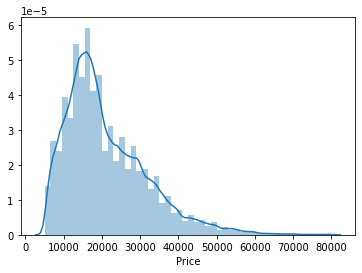

In [17]:
sn.distplot(data.Price);

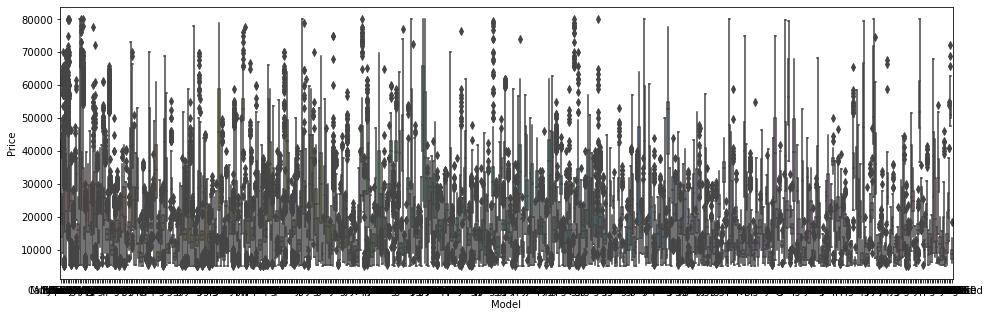

In [19]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'Model']],  x='Model', y='Price');

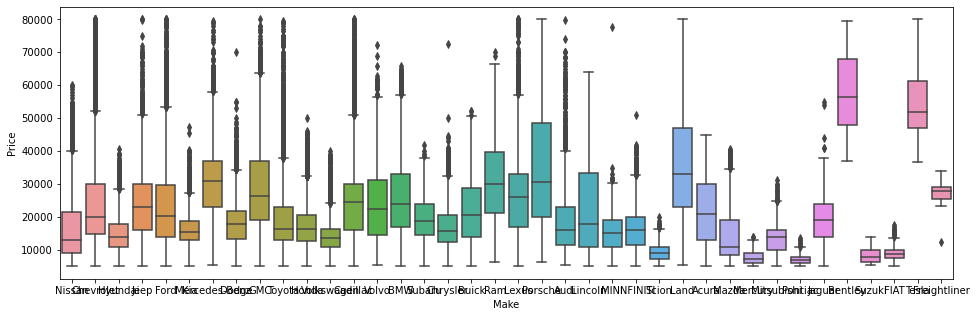

In [20]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'Make']],  x='Make', y='Price');

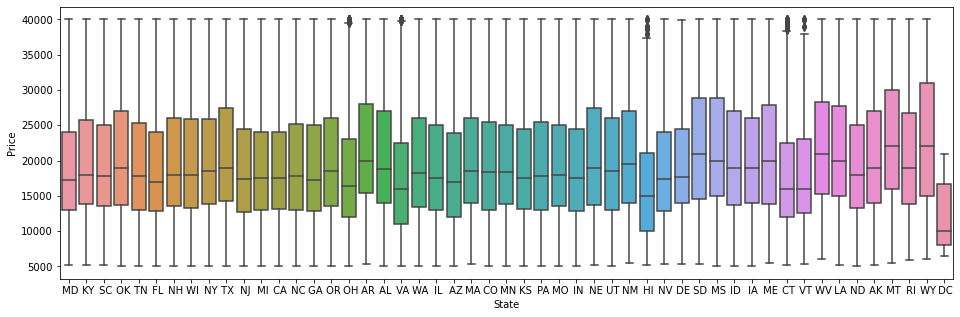

In [21]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'State']][data['Price']<40000],  x='State', y='Price');

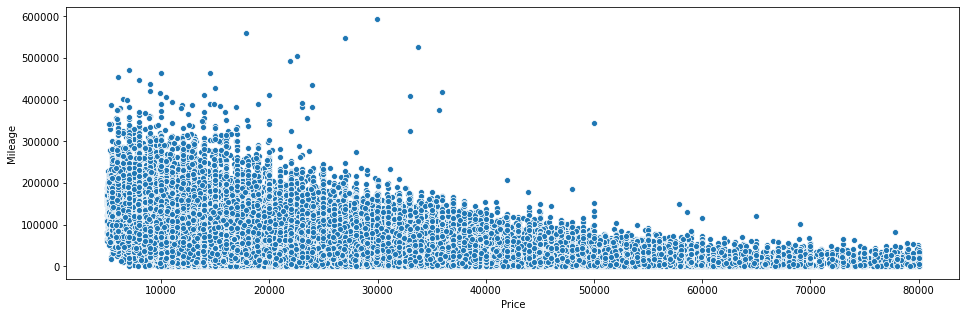

In [22]:
plt.figure(figsize=(16,5))
sn.scatterplot(data=data[data['Mileage']<600000][['Mileage', 'Price']], y='Mileage', x='Price');

In [23]:
data['Mileage'].describe()

count    5.000000e+05
mean     5.507643e+04
std      4.089704e+04
min      5.000000e+00
25%      2.585500e+04
50%      4.299000e+04
75%      7.740600e+04
max      2.457832e+06
Name: Mileage, dtype: float64

In [24]:
data[data['Mileage']<600000][['Price', 'Year', 'Mileage']].corr()

,Price,Year,Mileage
Price,1.000000,0.479853,-0.476942
Year,0.479853,1.000000,-0.760352
Mileage,-0.476942,-0.760352,1.000000


In [25]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model', 'quartil_make',
       'quartil_state'],
      dtype='object')

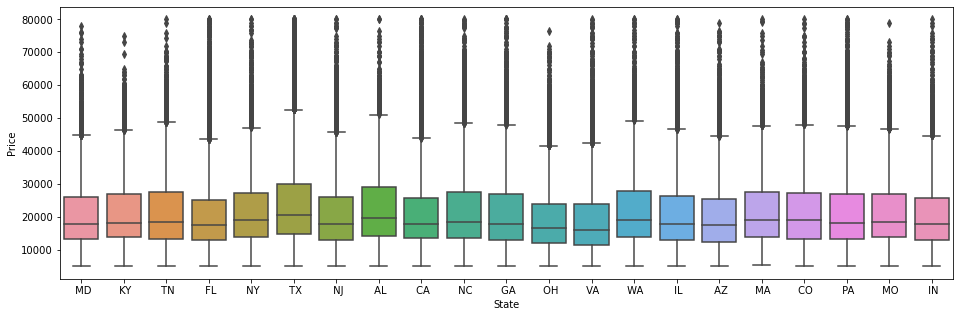

In [26]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[data['State'].isin(estados.iloc[:21,0])][['Price', 'State']],  x='State', y='Price');

In [27]:
make['Make'].head()

Ford         78627
Chevrolet    72900
Toyota       57485
Honda        41490
Jeep         30413
Name: Make, dtype: int64

In [28]:
modelos['cont_pct'] = modelos['Model'] / 500000

In [29]:
modelos

,Model,cumsum,pct_acum,pct_ind,cont_pct
Silverado,22562,22562,0.045124,0.045124,0.045124
Grand,15382,37944,0.075888,0.030764,0.030764
Sierra,10423,48367,0.096734,0.020846,0.020846
Accord,9145,57512,0.115024,0.018290,0.018290
F-1504WD,8379,65891,0.131782,0.016758,0.016758
...,...,...,...,...,...
Element2WD,69,499735,0.999470,0.000138,0.000138
MuranoS,68,499803,0.999606,0.000136,0.000136
PathfinderSE,66,499869,0.999738,0.000132,0.000132
RX-84dr,66,499935,0.999870,0.000132,0.000132


In [30]:
data.Mileage.describe()

count    5.000000e+05
mean     5.507643e+04
std      4.089704e+04
min      5.000000e+00
25%      2.585500e+04
50%      4.299000e+04
75%      7.740600e+04
max      2.457832e+06
Name: Mileage, dtype: float64

In [31]:
# Agrupación variable marcas (otro): se reducen las marcas teniendo en cuenta el % de participación de cada una (max 4%)

top_marcas = data.Make.value_counts().to_frame()
top_marcas['pctn'] = top_marcas['Make']/500000
top_marcas = top_marcas[top_marcas.pctn >= 0.04]
top_marcas=top_marcas.reset_index().drop(columns=['pctn','Make'])
top_marcas = top_marcas['index'].tolist()

data['marca_ct']=np.where(data['Make'].isin(top_marcas),data['Make'],'Otro')

Categorización de las variables numéricas

In [32]:
# Categoprizacion de variables numéricas:

# Mileage
data['mileage_cut'] = pd.cut(data.Mileage, bins=[4 , data.Mileage.quantile(0.25) , data.Mileage.quantile(0.50), 
                                                 data.Mileage.quantile(0.75), data.Mileage.max() ], 
                             labels=[1,2,3,4]  )

# Año
data['yaer_cut'] = pd.cut(data.Year, bins=[1996, 2000, 2010, 2018], labels=[1,2,3])


In [33]:
# Ze pasan a valores enteros:

data['mileage_cut']=data['mileage_cut'].astype('int') 
data['yaer_cut'] = data['yaer_cut'].astype('int')


Particion de los datos

In [34]:
# Train

x = data[['Year', 'Mileage', 'quartil_make','quartil_state']].iloc[:500000]
y = data['Price'].iloc[:500000]


Se opta por usar las variables de año, Mileage y cuartiels de make y State como variables regresoras (presentan un mejor desempeño).

# 2. MODELAMIENTO 

In [36]:
import seaborn as sn
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score as cvs
import sklearn


###### Prueba inicial con Random Forest sin calibrar

In [37]:
%%time

# Modelo usando únicamente ['Year', 'mileage_cut'] como variables regresoras

modelo_rfr = rfr()

res_2  = np.sqrt(abs(cvs(modelo_rfr, x,y, cv=4, scoring='neg_mean_squared_error')))


# [10879.77414699, 10702.09670534, 10763.2634908 , 10602.23985206]

Wall time: 6min 25s


In [38]:
np.mean(res_2)

8895.496741194984

### 2.1. CALIBRACIÓN ADABOOST

In [39]:
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

Calibración: Para modelas con el algoritmo adaboost se determinó calibrar los parámetros "tasa de aprendizaje" y "cantidad de árboles". Esto con el objetivo de tener un algoritmo con mejor poder de predicción. Para este caso utilizamos una grilla de manera que se pudiera hacer la calibración en simultánea con toddas las combinaciones de las alternativas planteadas. Para tasa de aprendizaje se utilizaron: 0.001, 0.1, 0.5 y 1. Para cantidad de árboles se utilizaron: 50,100 y 200 árboles. Los resultados se muestran a continuación.

In [40]:
%%time

param_grid_ad = {'learning_rate': [0.001,0.1, 0.5, 1.0], 'n_estimators':[50, 100,200]}

cv=4

model_ad = AdaBoostRegressor()

grid_search = GridSearchCV(estimator = model_ad, param_grid = param_grid_ad,cv = cv)

grid_search.fit(x, y)

Wall time: 33min 35s


GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [41]:
learning_rate=grid_search.best_params_['learning_rate']

n_estimators=grid_search.best_params_['n_estimators']


In [42]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

Implementación del modelo y desempeño mediante CV manual:

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean
kf=KFold(n_splits=10)

In [44]:
#Función para calular el MSE dada cierta partición del set de datos.
def get_MSE(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return mean_squared_error(y_test, model.predict(X_test))

In [45]:
MSE_ad=[]
modelo_ad =AdaBoostRegressor(n_estimators= n_estimators,learning_rate=learning_rate)
for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test=x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]
    MSE_ad.append(get_MSE(modelo_ad,X_train, X_test, y_train, y_test))
ad_RMSE=np.sqrt(mean(MSE_ad))

In [46]:
print(f"RMSE de modelo Adaboost calibrado: {ad_RMSE}")

RMSE de modelo Adaboost calibrado: 8173.47846700392


El modelo de Adaboost tiene un desempeño de 8173 en CV de 10 folds

## 2.2 RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestRegressor

Calibración: Para modelas con el algoritmo random forest se determinó calibrar los parámetros "profundidad" y "cantidad de árboles" y "máxima cantidad de variables en cada partición". Esto con el objetivo de tener un algoritmo con mejor poder de predicción. Para este caso utilizamos una grilla de manera que se pudiera hacer la calibración en simultánea con toddas las combinaciones de las alternativas planteadas. Para profundidad se utilizaron: 2 y 4. Para cantidad de árboles se utilizaron: 50,100 y 200 árboles y para máxima cantidad de varibales en cada partición 2 y3. Los resultados se muestran a continuación.

In [54]:
%%time

param_grid_rf = {'max_depth': [2,4],'max_features': [2,3,4],'n_estimators':[50,100,200]}

rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf,cv = 4, n_jobs = -1, verbose = 2)

grid_search_rf.fit(x, y) 

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.4min finished


Wall time: 7min 20s


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'max_features': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [55]:
max_depth=grid_search_rf.best_params_['max_depth']
max_features=grid_search_rf.best_params_['max_features']
n_estimators=grid_search_rf.best_params_['n_estimators']
print((grid_search_rf.best_params_)) 

{'max_depth': 4, 'max_features': 3, 'n_estimators': 200}


Implementación del modelo y desempeño mediante CV manual:

In [56]:
MSE_rf=[]
modelo_rf = RandomForestRegressor(bootstrap= True,n_estimators =n_estimators,max_depth=max_depth,
                                   max_features =max_features,random_state = 123)
for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test=x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]
    MSE_rf.append(get_MSE(modelo_rf,X_train, X_test, y_train, y_test))
rf_RMSE=np.sqrt(mean(MSE_rf))
rf_RMSE

7996.91524434551

Random forest mejor que que Adaboost

## 2.3 XGBOOST

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

Para modelas con el algoritmo XGBOOST se determinó calibrar los parámetros "máxima cantidad de variables en cada partición", "tasa de aprendizaje" y "cantidad de árboles". Esto con el objetivo de tener un algoritmo con mejor poder de predicción. Para este caso se hizo la calibración de manera independiente sobre cada hiperparámetro. Para tasa de aprendizaje se utilizaron: 0.001, 0.1, 0.5 y 1. Para cantidad de árboles se utilizaron: 50,100 y 200 árboles. Para máxima cantidad de variables en cada partición se utilizaron 2, 3 y 4. Los resultados se muestran a continuación.

In [58]:
%%time

# CALIBRACIÓN MAX_FEATURES:

max_features_range=[2,3,4]

cv_scores  = []

for max_features in max_features_range:
        modelo = GradientBoostingRegressor(
                    max_features = max_features,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring="neg_mean_squared_log_error",
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Wall time: 4min 34s


Valor óptimo de max_features: 4


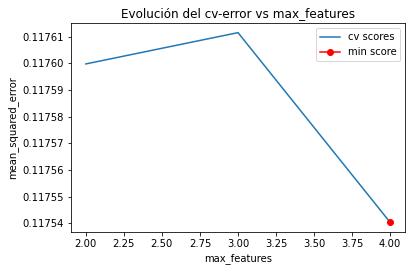

In [59]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs max_features")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

Calibración LEARNING RATE

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
# CALIBRACIÓN LEARNING RATE:

learning_rate_range=[0.001,0.1,0.5, 1]
cv_scores  = []

for lr in learning_rate_range:
        modelo = GradientBoostingRegressor(
                    learning_rate = lr,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring='neg_root_mean_squared_error',
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Valor óptimo de learning_rate: 0.5


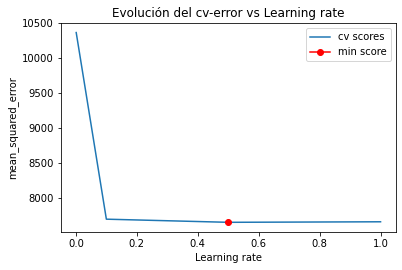

In [62]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(learning_rate_range, cv_scores, label="cv scores")
ax.plot(learning_rate_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("Learning rate")
ax.set_title("Evolución del cv-error vs Learning rate")
plt.legend();
print(f"Valor óptimo de learning_rate: {learning_rate_range[np.argmin(cv_scores)]}")

Calibración N_ESTIMATORS

In [63]:
# CALIBRACIÓN NÚMERO DE ESTIMADORES:

n_estimadores_range=[50, 100, 200]
cv_scores  = []
for n_est in n_estimadores_range:
        modelo = GradientBoostingRegressor(
                    n_estimators = n_est,
                    random_state = 123)

        scores = cross_val_score(
            estimator = modelo,
            X= x, y= y,scoring='neg_root_mean_squared_error',
                    cv= 4)

        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())

Valor óptimo de max_features: 200


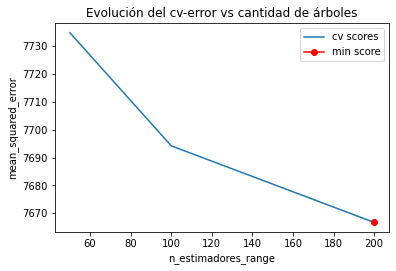

In [64]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(n_estimadores_range, cv_scores, label="cv scores")
ax.plot(n_estimadores_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("n_estimadores_range")
ax.set_title("Evolución del cv-error vs cantidad de árboles")
plt.legend();
print(f"Valor óptimo de max_features: {n_estimadores_range[np.argmin(cv_scores)]}")

Implementación del modelo y desempeño mediante CV manual:

In [65]:
MSE_gb=[]
modelo_gb = GradientBoostingRegressor(n_estimators = 200, learning_rate =0.5,max_features =4, random_state = 123)
for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test=x.loc[train_index],x.loc[test_index],y.loc[train_index],y.loc[test_index]
    MSE_gb.append(get_MSE(modelo_gb,X_train, X_test, y_train, y_test))
gb_RMSE=np.sqrt(mean(MSE_gb))

In [66]:
print(f"RMSE de modelo XGBoost calibrado: {gb_RMSE}")

RMSE de modelo XGBoost calibrado: 7638.838024535112


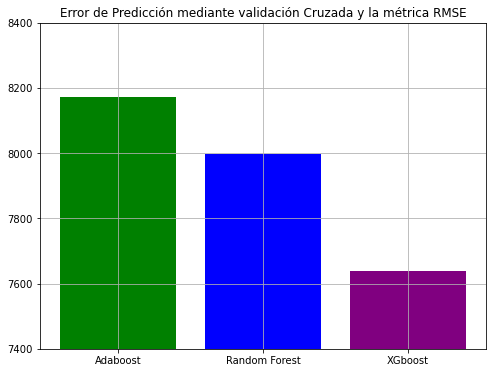

In [69]:
modelos=["Adaboost","Random Forest", "XGboost"]
res_modelos=[ad_RMSE,rf_RMSE,gb_RMSE]
fig = plt.figure(figsize=(8,6))
New_Colors = ['green','blue','purple']
plt.bar(modelos,res_modelos,color=New_Colors)
plt.title("Error de Predicción mediante validación Cruzada y la métrica RMSE")
plt.ylim(7400,8400)
plt.grid(True)
plt.show()

XGBOOST es el modelo con menor error de predicción, por o tanto este modelo con los respectivos hiperparámetros de calibración será el utilizado en la API.

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
